自由エネルギー精度(beta/gamma)の更新のサンプルコード \\
(神経プロセス理論においてはドパミンと対応づけられる)

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
E = np.array([0.5, 0.5]) #各ポリシーに対して固定された事前分布 (habits, 癖)
G = np.array([1,0]) #各ポリシーに対する期待自由エネルギーの例
F = np.array([0, 1]) #新たな観測を取得した後の各ポリシーに対する変分自由エネルギーの例

gamma_0 = 1 #開始時の期待自由エネルギーの精度
gamma = gamma_0 #更新される期待自由エネルギー精度
beta_prior = 1/gamma
beta_posterior = beta_prior
psi = 2 #ステップサイズパラメータ()

In [43]:
gamma_dopamine = [gamma_0, gamma_0, gamma_0]
policies_neural = []

for ni in range(16):
    #各ポリシーに対して, priorとposteriorを計算
    pi_0 = np.exp(np.log(E)-gamma*G) / np.sum(np.exp(np.log(E) - gamma*G)) #各ポリシーの事前分布を計算
    pi_posterior = np.exp(np.log(E)-gamma*G-F) / np.sum(np.exp(np.log(E)-gamma*G-F))

    #自由エネルギーの精度を計算
    G_error = np.dot(pi_posterior - pi_0, -G)

    beta_update = beta_posterior - beta_prior + G_error
    beta_posterior = beta_posterior - beta_update/psi

    gamma = 1/beta_posterior

    gamma_dopamine.append(gamma)
    policies_neural.append(pi_posterior)



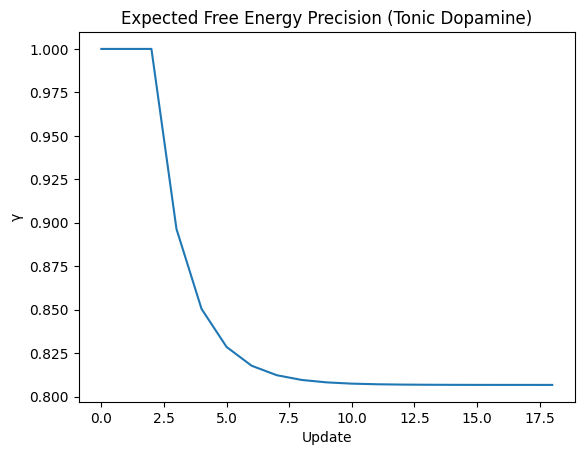

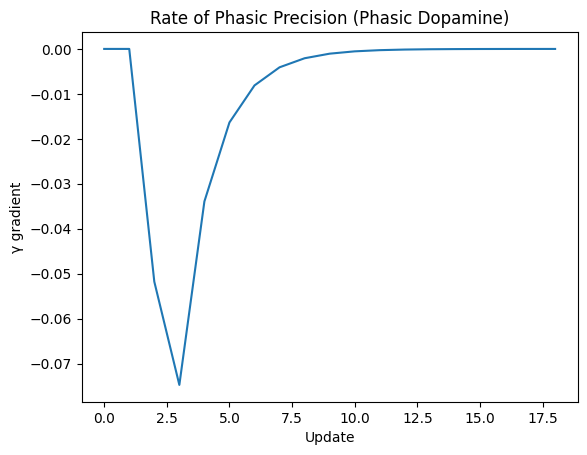

In [44]:
import matplotlib.pyplot as plt

x_values = list(range(len(gamma_dopamine)))

plt.plot(x_values, gamma_dopamine)
plt.title('Expected Free Energy Precision (Tonic Dopamine)')
plt.xlabel('Update')
plt.ylabel('γ')
plt.show()

plt.plot(x_values, np.gradient(gamma_dopamine))
plt.title('Rate of Phasic Precision (Phasic Dopamine)')
plt.xlabel('Update')
plt.ylabel('γ gradient')
plt.show()